In [1]:
import matplotlib.pylab as plt
import numpy as np
import torch
from torch.autograd import Variable

import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

### MNISTサンプルのダウンロード

In [4]:
root = './data'
download = False
trans = transforms.Compose([transforms.ToTensor(),])# transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root=root, train=True, transform=trans, download=download)
test_set = dset.MNIST(root=root, train=False, transform=trans)

batch_size = 1
kwargs = {'num_workers': 1, 'pin_memory': True}
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
                 #, **kwargs)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)
                #, **kwargs)

print('==>>> total trainning batch number: {}'.format(len(train_loader)))
print('==>>> total testing batch number: {}'.format(len(test_loader)))

==>>> total trainning batch number: 60000
==>>> total testing batch number: 10000


torch.Size([1, 1, 28, 28])
<class 'torch.FloatTensor'> torch.Size([28, 28])


/Users/Kevin/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


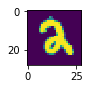

<class 'torch.LongTensor'> 
 2
[torch.LongTensor of size 1]

torch.Size([1, 1, 28, 28])
<class 'torch.FloatTensor'> torch.Size([28, 28])


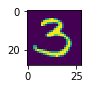

<class 'torch.LongTensor'> 
 3
[torch.LongTensor of size 1]

torch.Size([1, 1, 28, 28])
<class 'torch.FloatTensor'> torch.Size([28, 28])


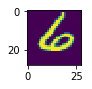

<class 'torch.LongTensor'> 
 6
[torch.LongTensor of size 1]



In [5]:
i = 0
#for batch_idx, (data, target) in enumerate(train_loader):
    #print('batch_idx : ' + str(batch_idx))
for (data, target) in train_loader:
    print(data.shape)
    
    data = data.view(28, 28)
    print(type(data), data.shape)
    #print(data)
    
    # 描画については、０から のch03/mnist.pyも参照
    plt.figure(figsize=(1, 1))
    plt.imshow(data.numpy())#, cmap=cm.gray_r)
    plt.show()
    
    print(type(target), target)
    i = i + 1
    if (i > 2):
        break

In [4]:
# init parameters
weight = Variable(torch.randn(28*28, 10), requires_grad=True)
bias = Variable(torch.randn(10), requires_grad=True)
lr = 0.001

In [5]:
for (input, target) in train_loader:
    #print(input, target)
    input, target = Variable(input), Variable(target)
    input = input.view(-1, 28*28)

    # 順伝播
    output = F.log_softmax(input.mm(weight).add(bias))
    loss = F.nll_loss(output, target)

    # 逆伝播
    loss.backward()

    # weight, biasの更新
    weight.data -= lr * weight.grad.data
    bias.data -=  lr * bias.grad.data
    
    # weight, biasの勾配を0にする
    weight.grad.data.zero_()
    bias.grad.data.zero_()




In [6]:
correct =  0
for (input, target) in test_loader:
    input, target = Variable(input), Variable(target)
    input = input.view(-1, 28*28)
    output = F.log_softmax(input.mm(weight).add(bias))
    pred = output.data.max(1)[1]
    correct += pred.eq(target.data).sum()

    
accuracy = correct / len(test_loader)

In [7]:
print('num of train_data : ', len(train_loader))
print('num of test_data  : ', len(test_loader))
print('accuracy : ' + str(accuracy))
print(correct, len(test_loader), accuracy)

num of train_data :  60000
num of test_data  :  10000
accuracy : 0.771
7710 10000 0.771


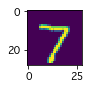

ansewer : 
 7
[torch.LongTensor of size 1]

pred    : 
 7
[torch.LongTensor of size 1]



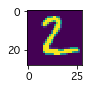

ansewer : 
 2
[torch.LongTensor of size 1]

pred    : 
 2
[torch.LongTensor of size 1]



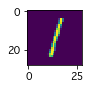

ansewer : 
 1
[torch.LongTensor of size 1]

pred    : 
 1
[torch.LongTensor of size 1]



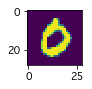

ansewer : 
 0
[torch.LongTensor of size 1]

pred    : 
 0
[torch.LongTensor of size 1]



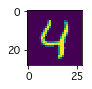

ansewer : 
 4
[torch.LongTensor of size 1]

pred    : 
 4
[torch.LongTensor of size 1]



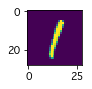

ansewer : 
 1
[torch.LongTensor of size 1]

pred    : 
 1
[torch.LongTensor of size 1]



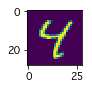

ansewer : 
 4
[torch.LongTensor of size 1]

pred    : 
 4
[torch.LongTensor of size 1]



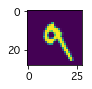

ansewer : 
 9
[torch.LongTensor of size 1]

pred    : 
 9
[torch.LongTensor of size 1]



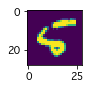

ansewer : 
 5
[torch.LongTensor of size 1]

pred    : 
 0
[torch.LongTensor of size 1]



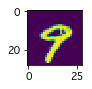

ansewer : 
 9
[torch.LongTensor of size 1]

pred    : 
 9
[torch.LongTensor of size 1]



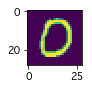

ansewer : 
 0
[torch.LongTensor of size 1]

pred    : 
 0
[torch.LongTensor of size 1]



In [8]:
i = 0
for (input, target) in test_loader:
    img = input.view(28, 28)
    ans = target
    
    input, target = Variable(input), Variable(target)
    input = input.view(-1, 28*28)
    output = F.log_softmax(input.mm(weight).add(bias))
    pred = output.data.max(1)[1]
    
    correct += pred.eq(target.data).sum()
    
    plt.figure(figsize=(1, 1))
    plt.imshow(img.numpy())#, cmap=cm.gray_r)
    plt.show()
    print('ansewer : ' + str(ans))
    print('pred    : ' + str(pred))


    i = i + 1
    if (i>10):
        break



In [9]:
output?